# Neural networks
![Neuron Image](pictures/NeuralNetworks/SololearnMachineLearningNeuron.jpg "Neuron")

<p>Each neuron have some inputs and some outputs (all outputs output same value).</p>
<p>In neuron, there are computation similar to Logistic regression $ w_1*x_1+w_2*x_2+b $ where $w$ are coeficients
 (weights), $b$ is bias and $x$ are inputs.</p>
<p>Neurons uses diffrent activation functions:</p>

- sigmoid
 - $\dfrac{1}{1+e^{-x}}$
 - $y = f(w_1*x_1+w_2*x_2+b) = \dfrac{1}{1+e^{-(w_1*x_1+w_2*x_2+b)}}$
 - ![Sigmoid Image](pictures/NeuralNetworks/SololearnMachineLearningSigmoid.png "Sigmoid fce")
- tanh
 - $f(x) = \tanh{(x)} = \dfrac{\sinh{(x)}}{\cosh{(x)}} = \dfrac{e^{x}-e^{-x}}{e^{x}+e^{-x}}$
 - ![Tanh Image](pictures/NeuralNetworks/SololearnMachineLearningTanh.jpg "Tanh fce")
- ReLu
 - $ ReLu(x) =
 \begin{cases}
    0 \ \ \ \text{ if } x \leq 0 \\
    x \ \ \ \text{ if } x > 0
 \end{cases}$
 - ![ReLU Image](pictures/NeuralNetworks/SololearnMachineLearningReLU.jpg "ReLU fce")

### Neurones are connected together and have 1 input layer, 1 output layer and X hidden layers

![Neural Network Image](pictures/NeuralNetworks/SololearnMachineLearningNeuralNetwork.jpg "Neural Network")

<p> To test network Loss function is used </p>

$ \text{cross entropy} =
 \begin{cases}
    p \ \ \ \ \ \ \ \ \ \ \text{ if } y = 1 \\
    1-p \ \ \ \text{ if } y = 0
 \end{cases}$

## Building artificial dataset
- <b>n_samples</b>: number of datapoints
- <b>n_features</b>: number of features
- <b>n_informative</b>: number of informative features
- <b>n_redundant</b>: number of redundant features
- <b>random_state</b>: random state to guarantee same result every time

<i> There are other functions to generate datasets <b>make_circles </b> and <b>make_moons</b></i>

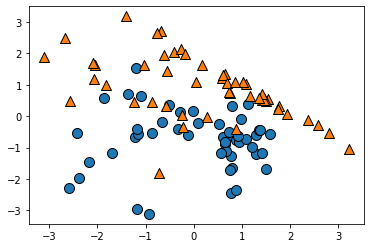

In [1]:
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2, random_state=3)
plt.scatter(X[y==0][:, 0], X[y==0][:, 1], s=100, edgecolors='k')
plt.scatter(X[y==1][:, 0], X[y==1][:, 1], s=100, edgecolors='k', marker='^')
plt.show()

In [2]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)
# mlp = MLPClassifier() # Makes warning because it needs more iteration
mlp = MLPClassifier(max_iter=1000)
mlp.fit(X_train, y_train)
print("accuracy:", mlp.score(X_test, y_test))

accuracy: 0.64


### More parameters
- <b>hidden_layer_sizes</b> shape of hidden layers <i>(default 1 layer 100 neurons)</i>
- <b>alpha</b> how match coefficients change <i>(default 0.0001)</i>
- <b>solver </b> sometimes different solver would give better performance <i>(default 'adam')</i>
 - options: 'lbfgs', 'sgd', 'adam'

In [3]:
mlp = MLPClassifier(max_iter=1000, hidden_layer_sizes=(100,50))
mlp.fit(X_train, y_train)
print("accuracy:", mlp.score(X_test, y_test))

accuracy: 0.72


In [4]:
mlp = MLPClassifier(max_iter=1000, hidden_layer_sizes=(100,50), alpha=0.0001, solver='adam', random_state=3)
mlp.fit(X_train, y_train)
print("accuracy:", mlp.score(X_test, y_test))

accuracy: 0.76


# Dataset MNIST

In [5]:
from sklearn.datasets import load_digits
X, y = load_digits(n_class=2, return_X_y=True)
print(X.shape, y.shape)
print(X[0])
print(y[0])

(360, 64) (360,)
[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
0


In [6]:
print(X[0].reshape(8, 8))

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


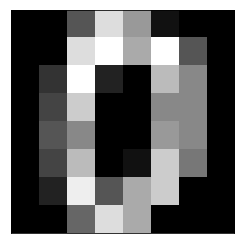

In [7]:
plt.matshow(X[0].reshape(8, 8), cmap=plt.cm.gray)
plt.xticks(())
plt.yticks(())
plt.show()

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)
mlp = MLPClassifier()
mlp.fit(X_train, y_train)

MLPClassifier()

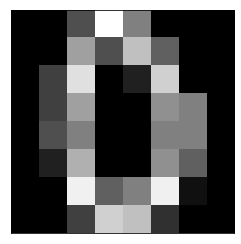

In [9]:
x = X_test[0]
plt.matshow(x.reshape(8,8), cmap=plt.cm.gray)
plt.xticks(())
plt.yticks(())
plt.show()

In [10]:
print(mlp.predict([x]))

[0]


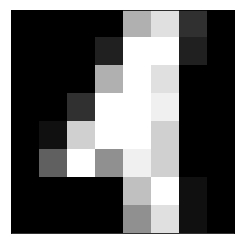

In [11]:
x = X_test[1]
plt.matshow(x.reshape(8,8), cmap=plt.cm.gray)
plt.xticks(())
plt.yticks(())
plt.show()

In [12]:
print(mlp.predict([x]))

[1]


In [13]:
print("accuracy:", mlp.score(X_test, y_test))

accuracy: 1.0


# All 10 numbers

In [14]:
X, y = load_digits(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)
mlp = MLPClassifier(random_state=2)
mlp.fit(X_train, y_train)
print(mlp.score(X_test, y_test))

0.96


In [15]:
y_pred = mlp.predict(X_test)
incorrect = X_test[y_pred != y_test]
incorrect_true = y_test[y_pred != y_test]
incorrect_pred = y_pred[y_pred != y_test]

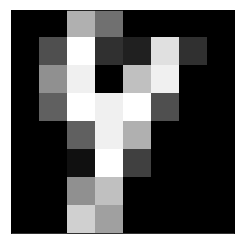

true value: 4
predicted value: 9


In [16]:
j = 0
plt.matshow(incorrect[j].reshape(8, 8), cmap=plt.cm.gray)
plt.xticks(())
plt.yticks(())
plt.show()
print("true value:", incorrect_true[j])
print("predicted value:", incorrect_pred[j])

# Open ML dataset

Open ML has a database of large datasets <a href="https://www.openml.org">OpenMl</a>

In [17]:
from sklearn.datasets import fetch_openml
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

In [18]:
print(X.shape, y.shape)
print(np.min(X), np.max(X))
print(y[0:5])

(70000, 784) (70000,)
0.0 255.0
['5' '0' '4' '1' '9']


In [19]:
X5 = X[y <= '3']
y5 = y[y<= '3']

In [20]:
mlp = MLPClassifier(
    hidden_layer_sizes=(6,),
    max_iter=200, alpha=1e-4,
    solver='sgd', random_state=2
)
mlp.fit(X5, y5)

MLPClassifier(hidden_layer_sizes=(6,), random_state=2, solver='sgd')

In [21]:
print(mlp.coefs_)
print(len(mlp.coefs_))
print(mlp.coefs_[0].shape)

[array([[-0.01115552, -0.08262686,  0.00865573, -0.01127273, -0.01387919,
        -0.02957114],
       [-0.05147713,  0.02078787, -0.03491842, -0.04063994,  0.02111255,
         0.00507921],
       [-0.06368948,  0.00236655, -0.05499934,  0.04973139,  0.06169476,
        -0.00100447],
       ...,
       [ 0.03318755,  0.03072565,  0.04947687, -0.07695885, -0.0220411 ,
        -0.00295469],
       [ 0.03754471,  0.02460134,  0.03225042,  0.04285259, -0.07510508,
        -0.05427305],
       [-0.06503639, -0.0702354 , -0.02863186, -0.01949455,  0.07608824,
        -0.05706929]]), array([[ 0.16384407, -2.14551277,  0.13976361,  0.98948196],
       [-0.03473962, -0.21458043, -0.31142087,  0.89646536],
       [-2.56156387, -0.46389099,  1.55137804,  1.35596203],
       [ 1.32290022, -2.67013776,  0.18579525, -0.01939255],
       [ 0.48546689, -0.68892009, -0.9192509 , -0.11729602],
       [ 0.13038516,  0.09871053, -0.78004331, -0.21692752]])]
2
(784, 6)


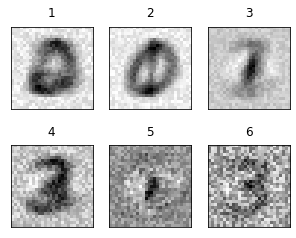

In [22]:
fig, axes = plt.subplots(2, 3, figsize=(5, 4))
for i, ax in enumerate(axes.ravel()):
    coef = mlp.coefs_[0][:, i]
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray)
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(i + 1)
plt.show()

#### Neural networks are
- bad at interpretability
- they are not slow, but not as fast as other models
- their best advantage is performance and it gets well with not structured data